In [1]:
# All imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import re

In [64]:
def re_rename_cols(df):
    """
    Used to rename columns and get rid of digits from columns' names
    """
    
    pattern = r'^(\D+)(\d+)(\D+)'

    cols = {name:re.sub(pattern,r"\1\3", name) for name in df.columns.to_list()} # Replace numbers in colums names
    #print(cols)
    return df.rename(columns = cols)


In [65]:
##
# Read both day 1&2 recalls 
data_dr1 = pd.read_sas('data/P_DR1IFF.XPT')
data_dr2 = pd.read_sas('data/P_DR2IFF.XPT')

data_dr1 = data_dr1.sort_values(['SEQN'])
data_dr2 = data_dr2.sort_values(['SEQN'])

data_dr1.reset_index(drop=True, inplace=True)
data_dr2.reset_index(drop=True, inplace=True)

##
# Variables that we need to calculate the HEI,
variables_of_interest = ['SEQN', 'DRIFDCD', 'DRIKCAL', 'DRISODI', 'DRISFAT', 'DRIMFAT', 'DRIPFAT','DRDRSTZ']


##
## Rename columns
data_dr1 = re_rename_cols(data_dr1)
data_dr2 = re_rename_cols(data_dr2)

##
# Check for unreliable rows in each file:

display(Markdown(f"***Number of unreliable rows (P_DR1IFF.XPT)***: {len(data_dr1[data_dr1['DRDRSTZ'] == 2])}"))
display(Markdown(f"***Number of unreliable rows (P_DR2IFF.XPT)***): {len(data_dr2[data_dr2['DRDRSTZ'] == 2])}"))

##
## Convert every to numeric to avoid errors during calculations

for col in variables_of_interest[2:-1]:
    data_dr1[col] = pd.to_numeric(data_dr1[col])
    data_dr2[col] = pd.to_numeric(data_dr2[col])

##
## Get only required rows:

data_dr1 = data_dr1[variables_of_interest]
data_dr2 = data_dr2[variables_of_interest]


data_dr1.reset_index(drop=True, inplace=True)


display(Markdown('***number of missing values per column before imputation***'))
display(data_dr1.isna().sum())
data_dr2.head()

***Number of unreliable rows (P_DR1IFF.XPT)***: 0

***Number of unreliable rows (P_DR2IFF.XPT)***): 0

***number of missing values per column before imputation***

SEQN          0
DRIFDCD       0
DRIKCAL    1404
DRISODI    1404
DRISFAT    1404
DRIMFAT    1404
DRIPFAT    1404
DRDRSTZ       0
dtype: int64

,SEQN,DRIFDCD,DRIKCAL,DRISODI,DRISFAT,DRIMFAT,DRIPFAT,DRDRSTZ
0,109263.0,94000100.0,5.397605e-79,6.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0
1,109263.0,91300100.0,2.700000e+01,6.0,2.000000e-03,3.000000e-03,5.000000e-03,1.0
2,109263.0,24168021.0,9.500000e+01,256.0,1.424000e+00,2.562000e+00,1.103000e+00,1.0
3,109263.0,91746100.0,9.800000e+01,12.0,2.616000e+00,1.037000e+00,1.840000e-01,1.0
4,109263.0,14107010.0,4.200000e+01,99.0,1.653000e+00,6.570000e-01,1.050000e-01,1.0


### Mean imputation

In [66]:
mean_value_dr1 = data_dr1.mean()
mean_value_dr2 = data_dr2.mean()

mean_imputation_dr1 = data_dr1.fillna(mean_value_dr1)
mean_imputation_dr2 = data_dr2.fillna(mean_value_dr2)

mean_imputation_dr1.to_csv('data/mean_imputation_dr1.csv', index=False)
mean_imputation_dr2.to_csv('data/mean_imputation_dr2.csv', index=False)

display(Markdown('***number of missing values per column before imputation***'))
display(data_dr1.isna().sum())
display(Markdown('***number of missing values per column after imputation***'))
display(mean_imputation_dr1.isna().sum())
mean_imputation_dr1.head()

***number of missing values per column before imputation***

SEQN          0
DRIFDCD       0
DRIKCAL    1404
DRISODI    1404
DRISFAT    1404
DRIMFAT    1404
DRIPFAT    1404
DRDRSTZ       0
dtype: int64

***number of missing values per column after imputation***

SEQN       0
DRIFDCD    0
DRIKCAL    0
DRISODI    0
DRISFAT    0
DRIMFAT    0
DRIPFAT    0
DRDRSTZ    0
dtype: int64

,SEQN,DRIFDCD,DRIKCAL,DRISODI,DRISFAT,DRIMFAT,DRIPFAT,DRDRSTZ
0,109263.0,28320300.0,1.140000e+02,649.0,1.472000e+00,2.105000e+00,9.480000e-01,1.0
1,109263.0,55501000.0,5.800000e+01,1.0,2.900000e-02,3.300000e-02,2.800000e-02,1.0
2,109263.0,94000010.0,5.397605e-79,5.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0
3,109263.0,94000100.0,5.397605e-79,4.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0
4,109263.0,11710801.0,1.290000e+02,47.0,1.635000e+00,2.521000e+00,1.391000e+00,1.0


### Median Imputation

In [67]:
median_value_dr1 = data_dr1.median()
median_value_dr2 = data_dr2.median()

median_imputation_dr1 = data_dr1.fillna(median_value_dr1)
median_imputation_dr2 = data_dr2.fillna(median_value_dr2)

median_imputation_dr1.to_csv('data/median_imputation_dr1.csv', index=False)
median_imputation_dr2.to_csv('data/median_imputation_dr2.csv', index=False)

display(Markdown('***number of missing values per column before imputation***'))
display(data_dr1.isna().sum())
display(Markdown('***number of missing values per column after imputation***'))
display(median_imputation_dr1.isna().sum())
median_imputation_dr1.head()

***number of missing values per column before imputation***

SEQN          0
DRIFDCD       0
DRIKCAL    1404
DRISODI    1404
DRISFAT    1404
DRIMFAT    1404
DRIPFAT    1404
DRDRSTZ       0
dtype: int64

***number of missing values per column after imputation***

SEQN       0
DRIFDCD    0
DRIKCAL    0
DRISODI    0
DRISFAT    0
DRIMFAT    0
DRIPFAT    0
DRDRSTZ    0
dtype: int64

,SEQN,DRIFDCD,DRIKCAL,DRISODI,DRISFAT,DRIMFAT,DRIPFAT,DRDRSTZ
0,109263.0,28320300.0,1.140000e+02,649.0,1.472000e+00,2.105000e+00,9.480000e-01,1.0
1,109263.0,55501000.0,5.800000e+01,1.0,2.900000e-02,3.300000e-02,2.800000e-02,1.0
2,109263.0,94000010.0,5.397605e-79,5.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0
3,109263.0,94000100.0,5.397605e-79,4.0,5.397605e-79,5.397605e-79,5.397605e-79,1.0
4,109263.0,11710801.0,1.290000e+02,47.0,1.635000e+00,2.521000e+00,1.391000e+00,1.0


### Random Sample Imputation


In [68]:
def random_sample_imputation(df):

    #create a copy of df
    df_ = df.copy()
    cols_with_missing_values = df.columns[df.isna().any()].tolist()
    for var in cols_with_missing_values:
        # extract a random sample
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                  random_state=0)
        # re-index the randomly extracted sample
        random_sample_df.index = df[df[var].isnull()].index
        # replace the NA
        df_.loc[df[var].isnull(), var] = random_sample_df
    return df_

##
# Apply the function to compute the 
data_random_imp_dr1 = random_sample_imputation(data_dr1)
data_random_imp_dr2 = random_sample_imputation(data_dr2)

data_random_imp_dr1.to_csv('data/data_random_imp_dr1.csv', index=False)

data_random_imp_dr2.to_csv('data/data_random_imp_dr2.csv', index=False)


display(Markdown('***number of missing values per column before imputation***'))
display(data_dr1.isna().sum())
display(Markdown('***number of missing values per column after imputation***'))
display(data_random_imp_dr1.isna().sum())

***number of missing values per column before imputation***

SEQN          0
DRIFDCD       0
DRIKCAL    1404
DRISODI    1404
DRISFAT    1404
DRIMFAT    1404
DRIPFAT    1404
DRDRSTZ       0
dtype: int64

***number of missing values per column after imputation***

SEQN       0
DRIFDCD    0
DRIKCAL    0
DRISODI    0
DRISFAT    0
DRIMFAT    0
DRIPFAT    0
DRDRSTZ    0
dtype: int64

### Mice Imputation

In [70]:
from miceforest import ImputationKernel

def mice_forest_imputer(df, file_name):
    mice_kernel = ImputationKernel(
        data = df.drop(columns=['SEQN','DRIFDCD', 'DRDRSTZ']),
        #save_all_iterations = True,
        random_state = 2025
    )
    mice_kernel.mice(10)
    mice_imputation = mice_kernel.complete_data()
    
    mice_imputation['SEQN'] = df['SEQN']
    mice_imputation['DRIFDCD'] = df['DRIFDCD']
    #mice_imputation['DRDRSTZ'] = df['DRDRSTZ']

    mice_imputation = mice_imputation[variables_of_interest[:-1]] # variables reordering

    mice_imputation.to_csv('data/' + file_name, index=False)

    
    display(Markdown('***number of missing values per column before imputation***'))
    display(df.isna().sum())
    display(Markdown('***number of missing values per column before imputation***'))
    display(mice_imputation.isna().sum())
    display(mice_imputation.head())
    return mice_imputation

mice_imputation_dr1 = mice_forest_imputer(data_dr1, 'mice_imputation_dr1.csv')
mice_imputation_dr2 = mice_forest_imputer(data_dr2, 'mice_imputation_dr2.csv')

***number of missing values per column before imputation***

SEQN          0
DRIFDCD       0
DRIKCAL    1404
DRISODI    1404
DRISFAT    1404
DRIMFAT    1404
DRIPFAT    1404
DRDRSTZ       0
dtype: int64

***number of missing values per column before imputation***

SEQN       0
DRIFDCD    0
DRIKCAL    0
DRISODI    0
DRISFAT    0
DRIMFAT    0
DRIPFAT    0
dtype: int64

,SEQN,DRIFDCD,DRIKCAL,DRISODI,DRISFAT,DRIMFAT,DRIPFAT
0,109263.0,28320300.0,1.140000e+02,649.0,1.472000e+00,2.105000e+00,9.480000e-01
1,109263.0,55501000.0,5.800000e+01,1.0,2.900000e-02,3.300000e-02,2.800000e-02
2,109263.0,94000010.0,5.397605e-79,5.0,5.397605e-79,5.397605e-79,5.397605e-79
3,109263.0,94000100.0,5.397605e-79,4.0,5.397605e-79,5.397605e-79,5.397605e-79
4,109263.0,11710801.0,1.290000e+02,47.0,1.635000e+00,2.521000e+00,1.391000e+00


***number of missing values per column before imputation***

SEQN          0
DRIFDCD       0
DRIKCAL    1128
DRISODI    1128
DRISFAT    1128
DRIMFAT    1128
DRIPFAT    1128
DRDRSTZ       0
dtype: int64

***number of missing values per column before imputation***

SEQN       0
DRIFDCD    0
DRIKCAL    0
DRISODI    0
DRISFAT    0
DRIMFAT    0
DRIPFAT    0
dtype: int64

,SEQN,DRIFDCD,DRIKCAL,DRISODI,DRISFAT,DRIMFAT,DRIPFAT
0,109263.0,94000100.0,5.397605e-79,6.0,5.397605e-79,5.397605e-79,5.397605e-79
1,109263.0,91300100.0,2.700000e+01,6.0,2.000000e-03,3.000000e-03,5.000000e-03
2,109263.0,24168021.0,9.500000e+01,256.0,1.424000e+00,2.562000e+00,1.103000e+00
3,109263.0,91746100.0,9.800000e+01,12.0,2.616000e+00,1.037000e+00,1.840000e-01
4,109263.0,14107010.0,4.200000e+01,99.0,1.653000e+00,6.570000e-01,1.050000e-01


### Plotting Mean, Median, Random Sample Implementation and Mice Implementation Data

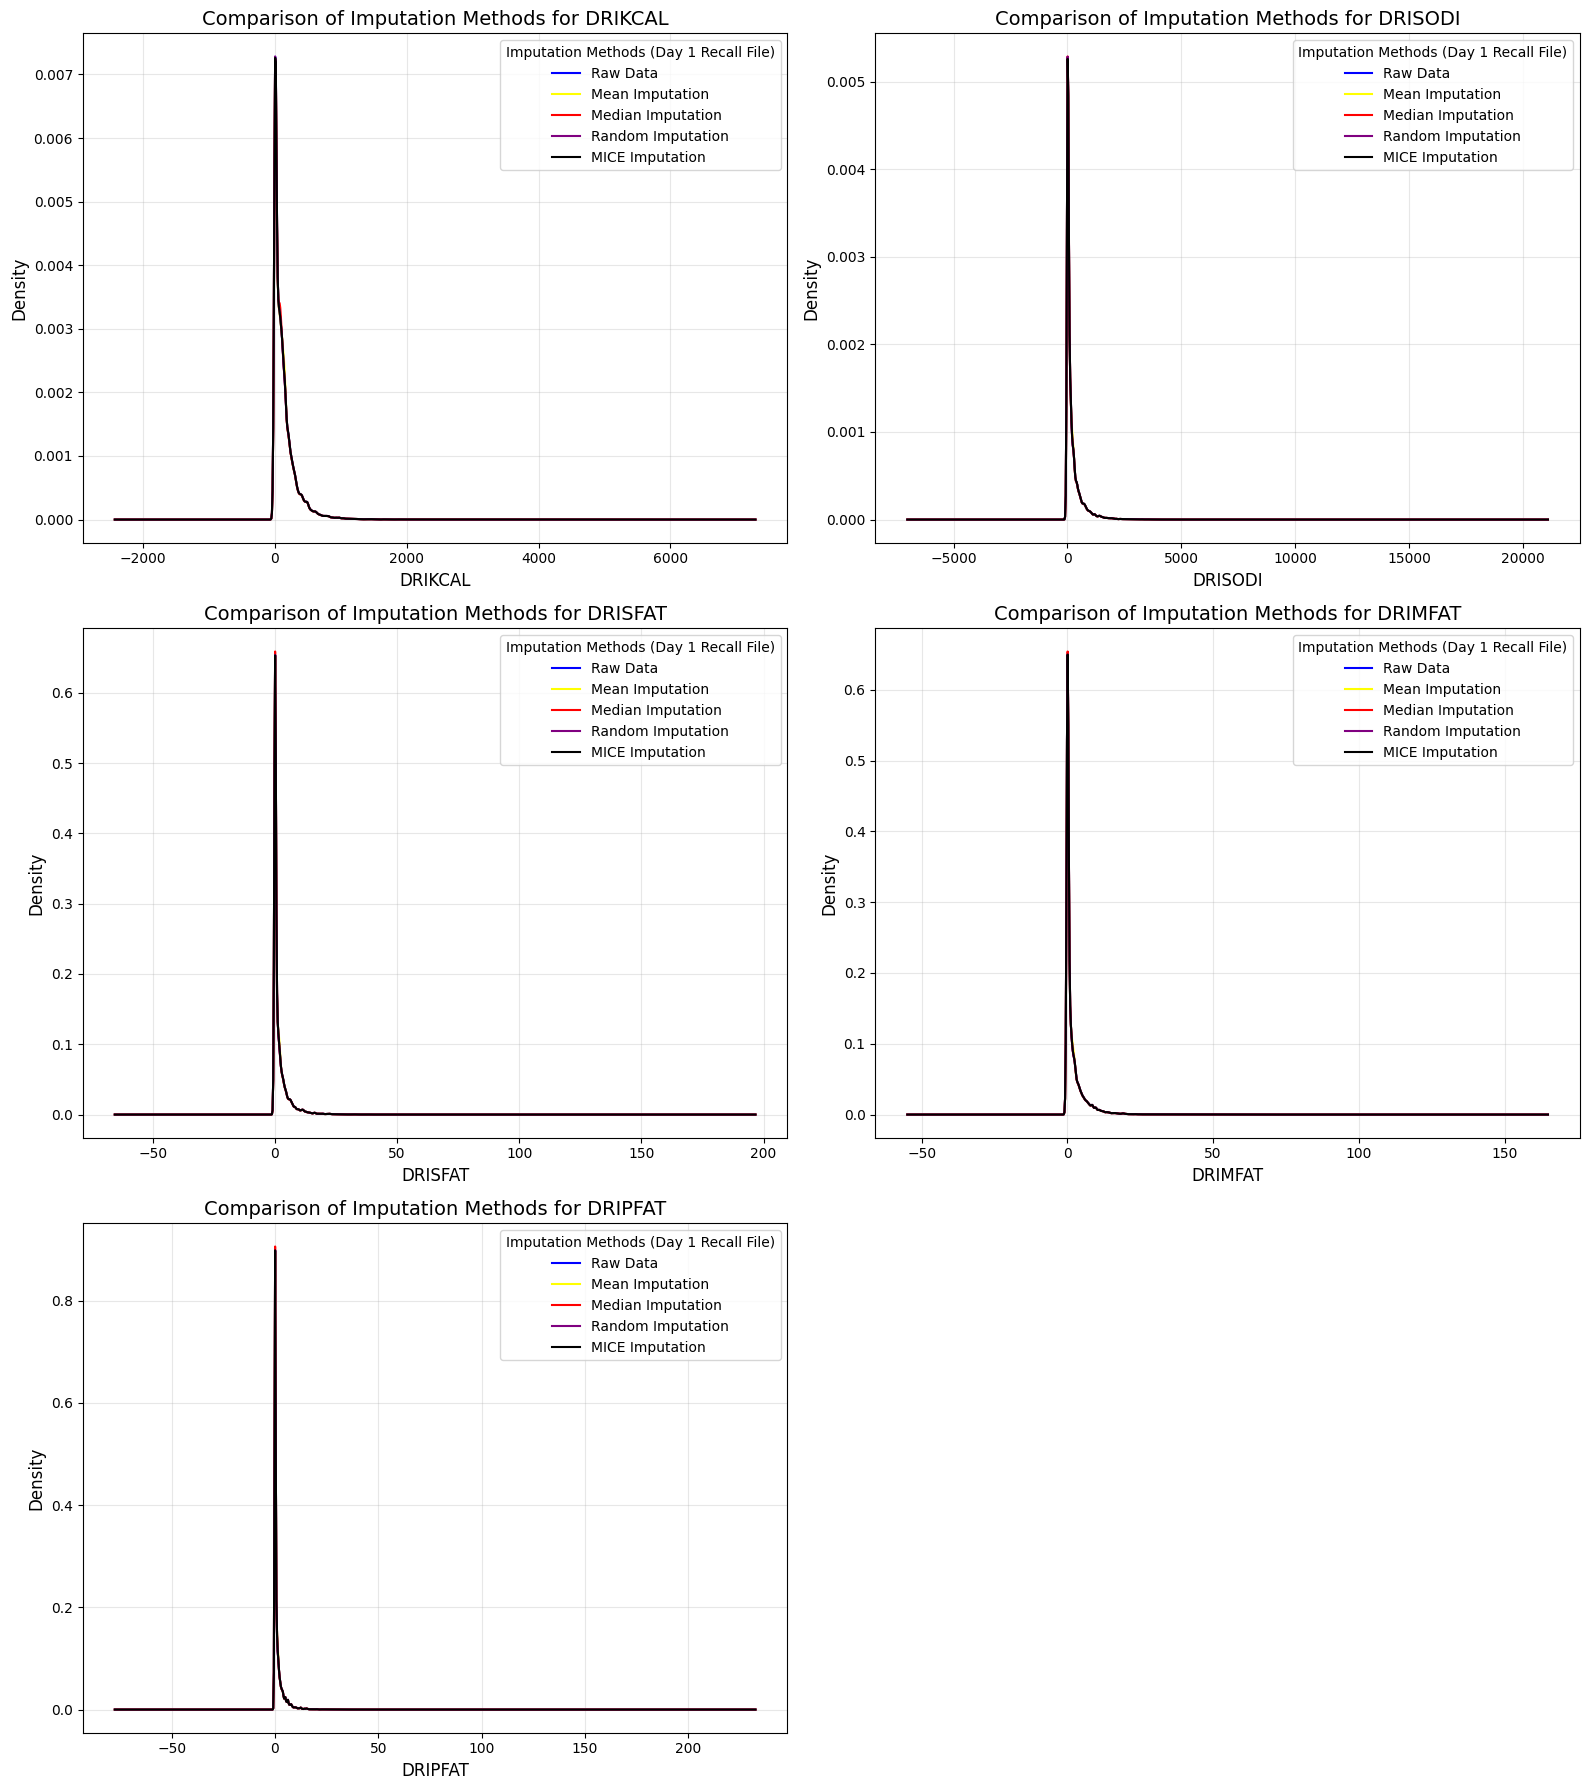

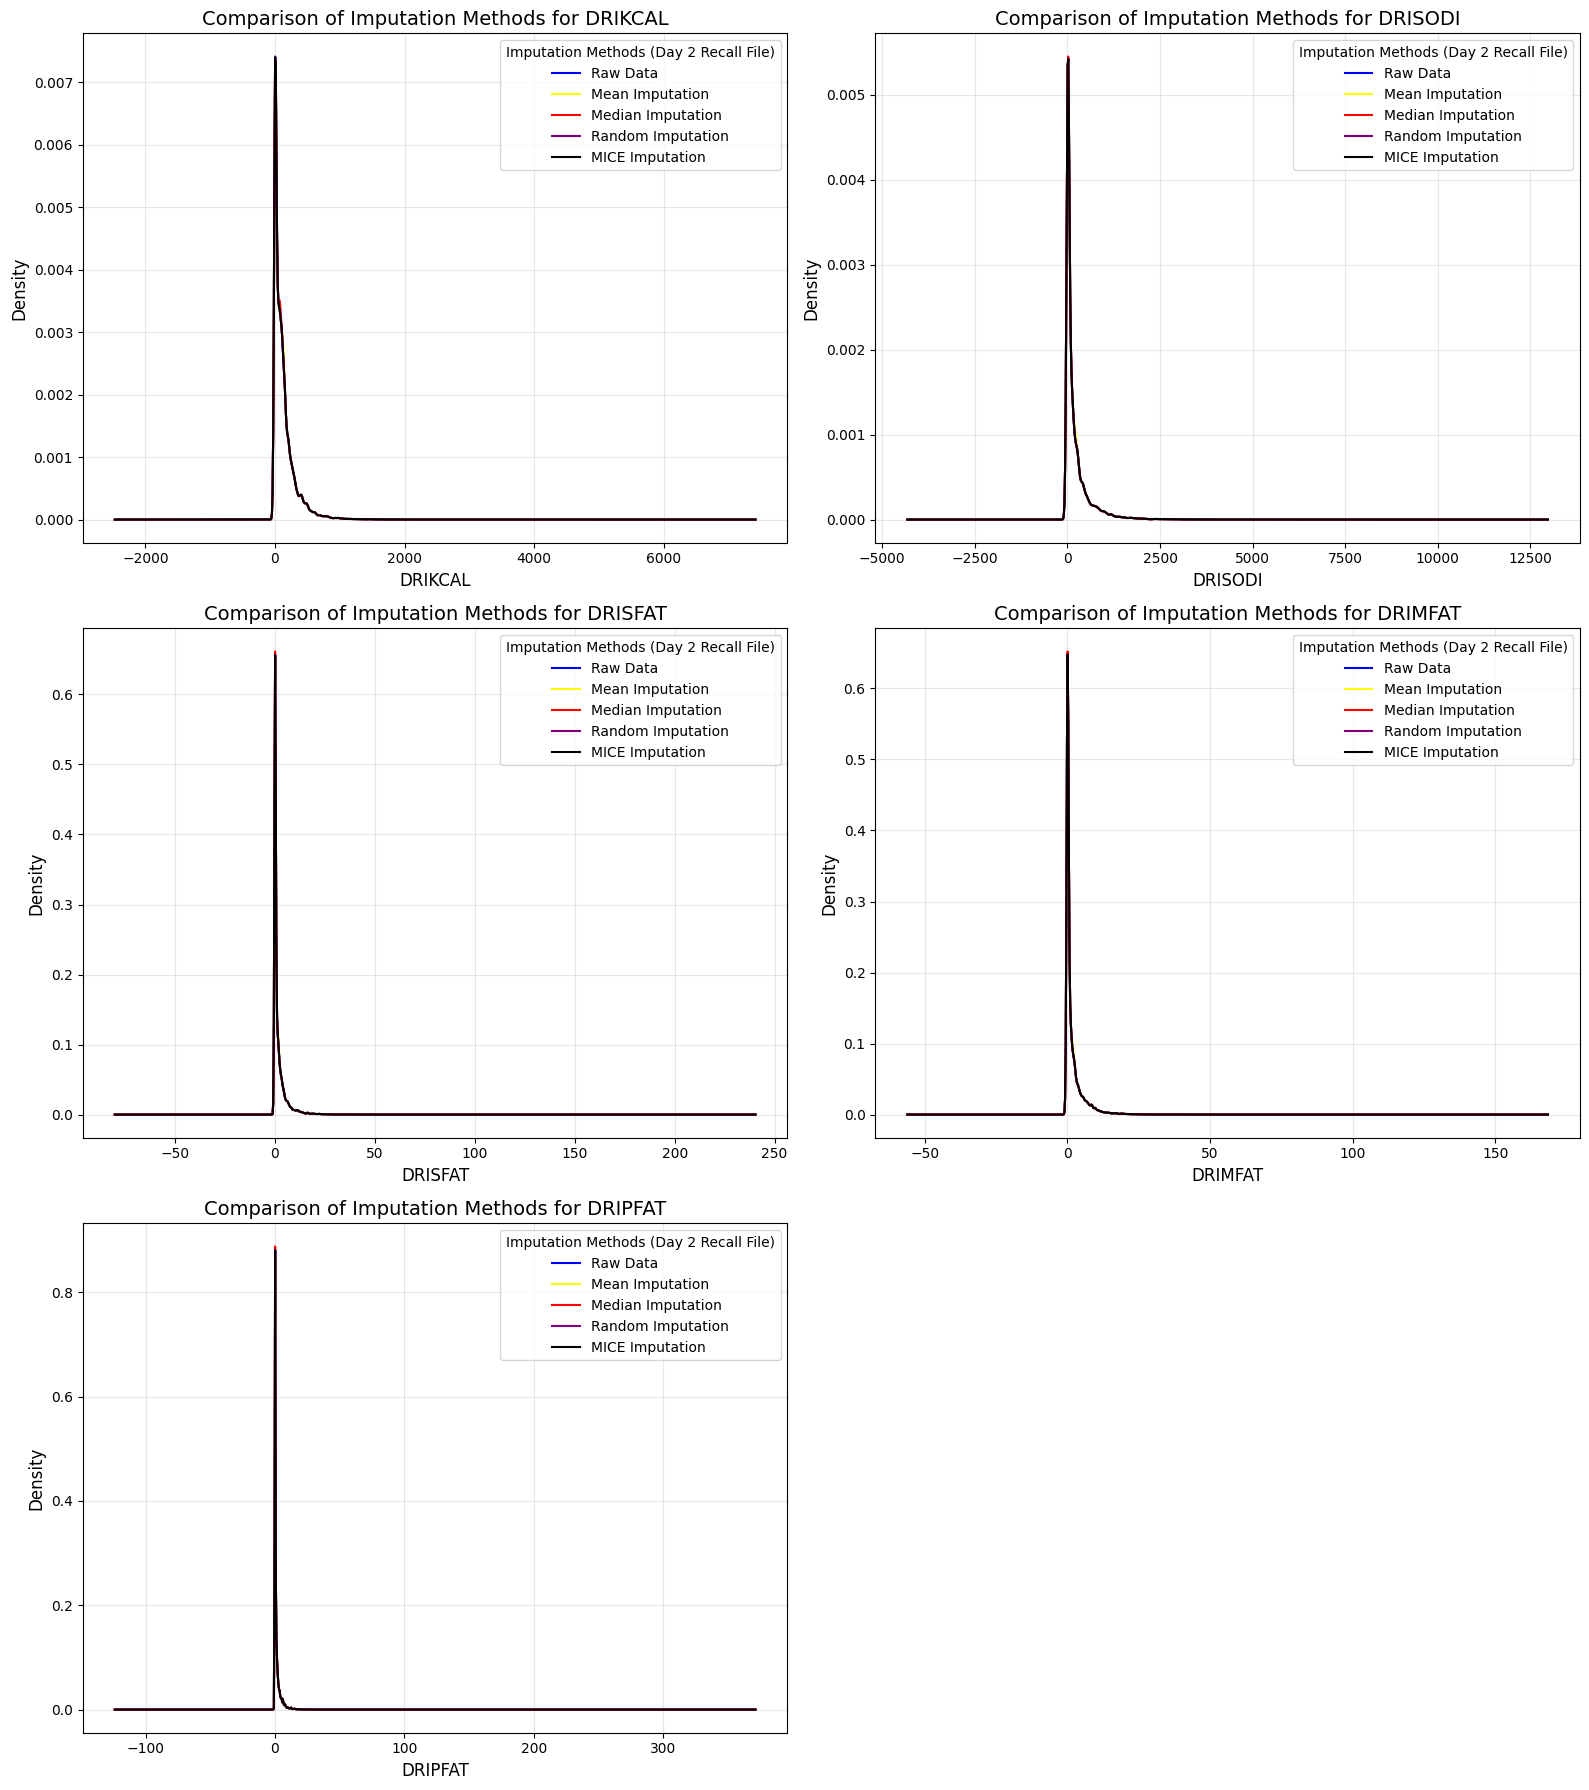

In [60]:
import matplotlib.pyplot as plt

def create_variable_distributions(raw_data, mean_imp, median_imp, random_imp, mice_imp, var_names, filename='Day 1 recall'):
    """
    Creates KDE plots for multiple variables with different imputation methods and the raw data.
    
    Args:
    raw_data (DataFrame): Original data with missing values.
    mean_imp (DataFrame): Data after mean imputation.
    median_imp (DataFrame): Data after median imputation.
    random_imp (DataFrame): Data after random imputation.
    mice_imp (DataFrame): Data after MICE imputation.
    var_names (list): List of variable names to plot.

    Saves:
    PNG files with comparison plots for each variable.
    """
    num_vars = len(var_names)
    rows = (num_vars + 1) // 2  # Two plots per row
    fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 6))  # Adjust height dynamically
    axes = axes.flatten()  # Flatten axes array for easy indexing
    
    for idx, var_name in enumerate(var_names):
        ax = axes[idx]
        
        # KDE for raw data
        raw_data[var_name].plot(kind='kde', ax=ax, label='Raw Data', color='blue')
        
        # KDE for mean imputation
        mean_imp[var_name].plot(kind='kde', ax=ax, label='Mean Imputation', color='yellow')
        
        # KDE for median imputation
        median_imp[var_name].plot(kind='kde', ax=ax, label='Median Imputation', color='red')
        
        # KDE for random imputation
        random_imp[var_name].plot(kind='kde', ax=ax, label='Random Imputation', color='purple')
        
        # KDE for MICE imputation
        mice_imp[var_name].plot(kind='kde', ax=ax, label='MICE Imputation', color='black')
        
        # Add legend, title, and labels
        ax.legend(title=f"Imputation Methods ({filename})")
        ax.set_title(f"Comparison of Imputation Methods for {var_name}", fontsize=14)
        ax.set_xlabel(var_name, fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
        ax.grid(True, alpha=0.3)
    
    # Remove unused subplots
    for idx in range(num_vars, len(axes)):
        fig.delaxes(axes[idx])
    
    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig(f"data/{'_'.join(filename.lower().split())}_imputation_comparison_multiple_variables.png", dpi=300)
    plt.show()

# Example usage:
create_variable_distributions(data_dr1, mean_imputation_dr1, median_imputation_dr1, data_random_imp_dr1, mice_imputation_dr1, variables_of_interest[2:-1], filename='Day 1 Recall File')# Except SEQN
create_variable_distributions(data_dr2, mean_imputation_dr2, median_imputation_dr2, data_random_imp_dr2, mice_imputation_dr2, variables_of_interest[2:-1],  filename='Day 2 Recall File')# Except SEQN

